In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [3]:
#getting data from yahoo finance
start = dt.datetime(2018,1,29)
end = dt.datetime.today()
stock = 'AAPL'
df = web.DataReader(stock,'yahoo',start,end)

In [4]:
print(df.head())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2018-01-29  170.160004  167.070007  170.160004  167.960007  50640400.0   
2018-01-30  167.369995  164.699997  165.529999  166.970001  46048200.0   
2018-01-31  168.440002  166.500000  166.869995  167.429993  32478900.0   
2018-02-01  168.619995  166.759995  167.169998  167.779999  47230800.0   
2018-02-02  166.800003  160.100006  166.000000  160.500000  86593800.0   

             Adj Close  
Date                    
2018-01-29  165.475677  
2018-01-30  164.500336  
2018-01-31  164.953522  
2018-02-01  165.298355  
2018-02-02  158.126022  


In [5]:
#saving data
data_source = r'C:\Users\saine\Desktop\Projects\Anaconda\stockEstimation\Applestock.csv'
df.to_csv(data_source)


In [6]:
#dataset martix i.e covert an array of values
def create_dataset(dataset, look_back=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a) #inputs
        dataY.append(dataset[i+look_back,0])#labels
    return numpy.array(dataX),numpy.array(dataY)

#fixing randoms
numpy.random.seed(7)

#load saved data set
dataframe = pd.read_csv('Applestock.csv', usecols=[1],engine='python', skipfooter=3)
dataset = dataframe.values
dataset=dataset.astype('float32')

print(dataset)

[[170.16]
 [167.37]
 [168.44]
 [168.62]
 [166.8 ]
 [163.88]
 [163.72]
 [163.4 ]
 [161.  ]
 [157.89]
 [163.89]
 [164.75]
 [167.54]
 [173.09]
 [174.82]
 [174.26]
 [174.12]
 [173.95]
 [175.65]
 [179.39]
 [180.48]
 [180.62]
 [179.78]
 [176.3 ]
 [177.74]
 [178.25]
 [175.85]
 [177.12]
 [180.  ]
 [182.39]
 [183.5 ]
 [180.52]
 [180.24]
 [179.12]
 [177.47]
 [176.8 ]
 [175.09]
 [172.68]
 [169.92]
 [173.1 ]
 [175.15]
 [170.02]
 [171.75]
 [168.94]
 [168.75]
 [172.01]
 [174.23]
 [172.48]
 [173.09]
 [174.  ]
 [173.92]
 [175.  ]
 [175.84]
 [176.19]
 [178.94]
 [178.82]
 [175.39]
 [171.22]
 [166.92]
 [166.33]
 [165.42]
 [165.73]
 [164.33]
 [167.26]
 [169.2 ]
 [177.75]
 [177.5 ]
 [184.25]
 [187.67]
 [186.22]
 [187.4 ]
 [190.37]
 [190.06]
 [189.53]
 [187.07]
 [188.46]
 [188.91]
 [187.81]
 [189.27]
 [188.88]
 [188.5 ]
 [188.84]
 [189.65]
 [188.75]
 [188.  ]
 [188.23]
 [190.26]
 [193.42]
 [193.94]
 [194.08]
 [194.2 ]
 [192.  ]
 [191.97]
 [192.61]
 [192.88]
 [191.57]
 [190.16]
 [189.22]
 [186.33]
 [187.2 ]


In [7]:
#normalize dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [8]:
print(dataset)

[[0.27851856]
 [0.24672365]
 [0.25891745]
 [0.26096857]
 [0.24022794]
 [0.20695162]
 [0.2051282 ]
 [0.20148146]
 [0.17413104]
 [0.1386894 ]
 [0.20706546]
 [0.21686614]
 [0.24866092]
 [0.31190884]
 [0.33162403]
 [0.32524216]
 [0.32364666]
 [0.3217094 ]
 [0.34108245]
 [0.3837036 ]
 [0.3961252 ]
 [0.3977207 ]
 [0.3881482 ]
 [0.34849012]
 [0.36490023]
 [0.37071216]
 [0.34336197]
 [0.3578347 ]
 [0.39065516]
 [0.41789162]
 [0.4305414 ]
 [0.3965813 ]
 [0.3933903 ]
 [0.3806268 ]
 [0.36182344]
 [0.35418808]
 [0.33470082]
 [0.30723643]
 [0.27578342]
 [0.3120228 ]
 [0.3353845 ]
 [0.27692318]
 [0.29663813]
 [0.26461542]
 [0.2624501 ]
 [0.29960108]
 [0.32490027]
 [0.30495727]
 [0.31190884]
 [0.3222792 ]
 [0.3213675 ]
 [0.33367527]
 [0.34324777]
 [0.3472365 ]
 [0.37857544]
 [0.3772081 ]
 [0.33811963]
 [0.29059827]
 [0.24159539]
 [0.23487186]
 [0.22450137]
 [0.22803414]
 [0.21207976]
 [0.24547005]
 [0.26757836]
 [0.3650142 ]
 [0.36216533]
 [0.43908823]
 [0.47806275]
 [0.46153843]
 [0.47498572]
 [0.50

In [9]:
#splitting data sets
splitting_ratio=0.64
train_size = int(len(dataset)*splitting_ratio)
test_size= len(dataset) - train_size
train,test = dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [10]:
#Reshaping
#reshape into x=t and y=t+1
look_back=3
trainX,trainY = create_dataset(train,look_back)
testX, testY = create_dataset(test,look_back)

#reshape input to be [sample,time steps, feature]
trainX= numpy.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX = numpy.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [11]:
#LSTM network for accuracy improvement using keras
model = Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2) #epoch is a unix timestamp

Epoch 1/100
 - 1s - loss: 0.2127
Epoch 2/100
 - 0s - loss: 0.0454
Epoch 3/100
 - 0s - loss: 0.0154
Epoch 4/100
 - 0s - loss: 0.0120
Epoch 5/100
 - 0s - loss: 0.0095
Epoch 6/100
 - 0s - loss: 0.0072
Epoch 7/100
 - 0s - loss: 0.0056
Epoch 8/100
 - 0s - loss: 0.0040
Epoch 9/100
 - 0s - loss: 0.0031
Epoch 10/100
 - 0s - loss: 0.0024
Epoch 11/100
 - 0s - loss: 0.0021
Epoch 12/100
 - 0s - loss: 0.0019
Epoch 13/100
 - 0s - loss: 0.0018
Epoch 14/100
 - 0s - loss: 0.0018
Epoch 15/100
 - 0s - loss: 0.0017
Epoch 16/100
 - 0s - loss: 0.0018
Epoch 17/100
 - 0s - loss: 0.0017
Epoch 18/100
 - 0s - loss: 0.0017
Epoch 19/100
 - 0s - loss: 0.0017
Epoch 20/100
 - 0s - loss: 0.0016
Epoch 21/100
 - 0s - loss: 0.0016
Epoch 22/100
 - 0s - loss: 0.0016
Epoch 23/100
 - 0s - loss: 0.0016
Epoch 24/100
 - 0s - loss: 0.0016
Epoch 25/100
 - 0s - loss: 0.0016
Epoch 26/100
 - 0s - loss: 0.0016
Epoch 27/100
 - 0s - loss: 0.0016
Epoch 28/100
 - 0s - loss: 0.0016
Epoch 29/100
 - 0s - loss: 0.0015
Epoch 30/100
 - 0s - lo

In [12]:
#making predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [13]:
#increasing accuracy

#invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#calculating RMS error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' %(testScore))

#shifting train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:,:] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:] = trainPredict

#shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1,:] = testPredict

Train Score: 2.37 RMSE
Test Score: 4.02 RMSE


0.6292503906939901


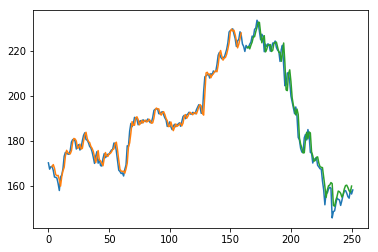

In [14]:
#plotting
accuracy = 1-((trainScore)/(trainScore+testScore))
print(accuracy)
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()